## Cargar los datos

Se deben poner todos los descriptores al mismo nivel que todos los archivos de la tarea, en la carpeta `descriptores`

In [1]:
from Data import load_dataset_pair

(queryset1, dataset1) = load_dataset_pair("descriptores/MEL128", 21573, 33545, 128)
print("Q1={} R1={}".format(queryset1.shape, dataset1.shape))

(queryset2, dataset2) = load_dataset_pair("descriptores/SIFT", 2886, 202088, 128)
print("Q2={} R2={}".format(queryset2.shape, dataset2.shape))

(queryset3, dataset3) = load_dataset_pair("descriptores/VGG19", 842, 10171, 4096)
print("Q3={} R3={}".format(queryset3.shape, dataset3.shape))

datasets = [(queryset1, dataset1), (queryset2, dataset2), (queryset3, dataset3)]


Q1=(21573, 128) R1=(33545, 128)
Q2=(2886, 128) R2=(202088, 128)
Q3=(842, 4096) R3=(10171, 4096)


## Calcular Dimensión Intrínseca de los Conjuntos

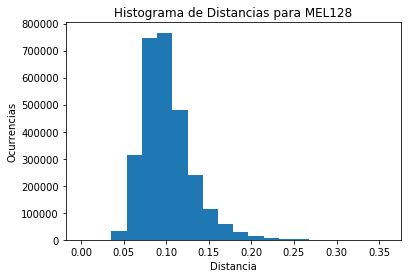

Dimensión Intrínseca MEL128 = 5.844565037971085


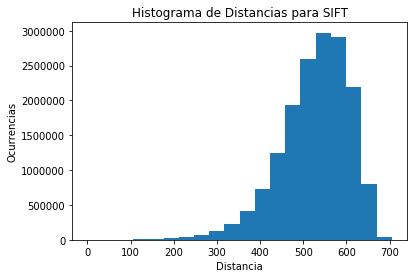

Dimensión Intrínseca SIFT = 21.517636196461847


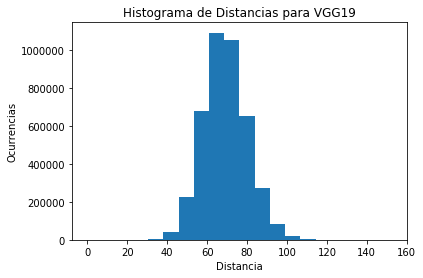

Dimensión Intrínseca VGG19 = 19.765340800174975


In [2]:
from Data import dimension_intrinseca

d1 = dimension_intrinseca(dataset1, titulo='Histograma de Distancias para MEL128', porc_muestras=0.05)
print(f'Dimensión Intrínseca MEL128 = {d1}')

d2 = dimension_intrinseca(dataset2, titulo='Histograma de Distancias para SIFT', porc_muestras=0.02)
print(f'Dimensión Intrínseca SIFT = {d2}')

d3 = dimension_intrinseca(dataset3, titulo='Histograma de Distancias para VGG19', porc_muestras=0.2)
print(f'Dimensión Intrínseca VGG19 = {d3}')

## Medir desempeño de los índices

Se construyen los índices y se prueban distintos parámetros para cada uno, se almacenan los resultados en arreglos por índice.

In [4]:
# imports para hacer las mediciones
from Index import Linear, KDTree, KMeansTree
from Results import obtener_curva

# inicializar arreglos para almacenar curvas
num_datasets = len(datasets)
curvas_kdtree = [[] for _ in range(num_datasets)]
leyenda_kdtree = [[] for _ in range(num_datasets)]
curvas_kmeans = [[] for _ in range(num_datasets)]
leyenda_kmeans = [[] for _ in range(num_datasets)]

### MEL128

In [5]:
print(f'Usando dataset MEL128')
dataset, queryset = datasets[0]

# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))
lscan_dists, lscan_time = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time))


# número de árboles a probar para KD-Tree
num_trees = [5, 10, 20, 30, 40, 60, 80]
for trees in num_trees:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kdtree[0].append([efectividad, eficiencia])
    leyenda_kdtree[0].append('{:d} árboles'.format(trees))
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time))


# número de ramas a probar para K-Means Tree
num_branches = [10, 20, 30, 40, 50, 60]
for branches in num_branches:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kmeans[0].append([efectividad, eficiencia])
    leyenda_kmeans[0].append('{:d} ramas'.format(branches))
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time))

print('----------------------------\n')


Usando dataset MEL128
construccion linear scan = 0.0
busqueda linear scan = 46.6

construccion 5-KDTree = 0.3
Punto1 = 6.7%, 0.0% (0.1s)
Punto2 = 11.6%, 0.0T (0.1s)
Punto3 = 18.7%, 0.0T (0.1s)
Punto4 = 26.5%, 0.0T (0.2s)
Punto5 = 34.8%, 0.0T (0.3s)
Punto6 = 45.0%, 0.0T (0.5s)
Punto7 = 56.0%, 0.0T (0.8s)
Punto8 = 67.8%, 0.0T (1.5s)
Punto9 = 78.8%, 0.1T (2.8s)
Punto10 = 88.1%, 0.1T (5.5s)
Punto11 = 94.5%, 0.2T (10.9s)
Punto12 = 98.1%, 0.5T (22.6s)
Punto13 = 99.5%, 1.1T (49.2s)
Punto14 = 99.9%, 2.4T (112.2s)
13 busquedas 5-KDTree = 206.9

construccion 10-KDTree = 0.6
Punto1 = 6.7%, 0.0% (0.2s)
Punto2 = 11.6%, 0.0T (0.2s)
Punto3 = 18.6%, 0.0T (0.2s)
Punto4 = 27.7%, 0.0T (0.2s)
Punto5 = 37.3%, 0.0T (0.3s)
Punto6 = 47.9%, 0.0T (0.6s)
Punto7 = 59.5%, 0.0T (1.1s)
Punto8 = 71.6%, 0.0T (1.8s)
Punto9 = 82.3%, 0.1T (3.3s)
Punto10 = 90.9%, 0.1T (6.5s)
Punto11 = 96.2%, 0.3T (12.9s)
Punto12 = 98.9%, 0.6T (27.0s)
Punto13 = 99.8%, 1.3T (60.7s)
Punto14 = 100.0%, 3.2T (147.9s)
13 busquedas 10-KDTree = 26

### SIFT

In [6]:
print(f'Usando dataset SIFT')
dataset, queryset = datasets[1]


# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))
lscan_dists, lscan_time = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time))


# número de árboles a probar para KD-Tree
num_trees = [2, 5, 10, 20, 40, 60]
for trees in num_trees:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kdtree[1].append([efectividad, eficiencia])
    leyenda_kdtree[1].append('{:d} árboles'.format(trees))
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time))


# número de ramas a probar para K-Means Tree
num_branches = [5, 10, 20, 30, 50]
for branches in num_branches:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kmeans[1].append([efectividad, eficiencia])
    leyenda_kmeans[1].append('{:d} ramas'.format(branches))
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time))

print('----------------------------\n')

Usando dataset SIFT
construccion linear scan = 0.0
busqueda linear scan = 35.9

construccion 5-KDTree = 0.0
Punto1 = 10.3%, 0.0% (0.5s)
Punto2 = 19.4%, 0.0T (0.5s)
Punto3 = 31.5%, 0.0T (0.5s)
Punto4 = 46.4%, 0.0T (0.7s)
Punto5 = 61.1%, 0.0T (1.1s)
Punto6 = 74.4%, 0.1T (1.9s)
Punto7 = 84.7%, 0.1T (3.5s)
Punto8 = 92.5%, 0.2T (6.5s)
Punto9 = 97.1%, 0.4T (12.7s)
Punto10 = 99.2%, 0.7T (25.4s)
Punto11 = 99.9%, 1.5T (52.9s)
10 busquedas 5-KDTree = 106.2

construccion 10-KDTree = 0.1
Punto1 = 10.1%, 0.0% (0.8s)
Punto2 = 18.5%, 0.0T (0.9s)
Punto3 = 31.2%, 0.0T (0.9s)
Punto4 = 48.2%, 0.0T (1.0s)
Punto5 = 63.6%, 0.0T (1.5s)
Punto6 = 77.6%, 0.1T (2.4s)
Punto7 = 87.8%, 0.1T (4.3s)
Punto8 = 94.4%, 0.2T (8.1s)
Punto9 = 97.9%, 0.4T (15.9s)
Punto10 = 99.4%, 0.9T (31.8s)
Punto11 = 99.9%, 1.9T (67.7s)
10 busquedas 10-KDTree = 135.1

construccion 20-KDTree = 0.2
Punto1 = 10.4%, 0.0% (1.6s)
Punto2 = 19.0%, 0.0T (1.6s)
Punto3 = 31.1%, 0.0T (1.7s)
Punto4 = 47.6%, 0.0T (1.8s)
Punto5 = 65.0%, 0.1T (2.0s)
Punto

### VGG19

In [5]:
print(f'Usando dataset VGG19')
dataset, queryset = datasets[2]


# construir el indice linear scan y buscar los NN
linear = Linear(dataset)
print("construccion linear scan = {:.1f}".format(linear.build_time))

lscan_dists, lscan_time = linear.search(queryset)
print("busqueda linear scan = {:.1f}\n".format(lscan_time))


# número de árboles a probar para KD-Tree
num_trees = [20, 30, 40, 60, 80]
for trees in num_trees:

    # construir el indice KD-Tree
    kdtree = KDTree(dataset, trees=trees)
    print('construccion {:d}-KDTree = {:.1f}'.format(trees, kdtree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kdtree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kdtree[2].append([efectividad, eficiencia])
    leyenda_kdtree[2].append('{:d} árboles'.format(trees))
    
    print('{:d} busquedas {:d}-KDTree = {:.1f}\n'.format(len(eficiencia) - 1, trees, sum(eficiencia) * lscan_time))


# número de ramas a probar para K-Means Tree
num_branches = [30, 50, 60, 70, 90]
for branches in num_branches:

    # construir el indice K-Means Tree
    kmeanstree = KMeansTree(dataset, branching=branches)
    print('construccion {:d}-KMeansTree = {:.1f}'.format(branches, kmeanstree.build_time))

    # obtener curva y agregar al arreglo
    efectividad, eficiencia = obtener_curva(kmeanstree, queryset, lscan_time, lscan_dists, verbose=True)
    curvas_kmeans[2].append([efectividad, eficiencia])
    leyenda_kmeans[2].append('{:d} ramas'.format(branches))
    
    print('{:d} busquedas {:d}-KMeansTree = {:.1f}\n'.format(len(eficiencia) - 1, branches, sum(eficiencia) * lscan_time))

print('----------------------------\n')

Usando dataset VGG19
construccion linear scan = 0.0
busqueda linear scan = 18.5

construccion 20-KDTree = 1.1
Punto1 = 5.1%, 0.0% (0.1s)
Punto2 = 9.2%, 0.0T (0.1s)
Punto3 = 15.0%, 0.0T (0.2s)
Punto4 = 25.0%, 0.0T (0.3s)
Punto5 = 40.3%, 0.0T (0.4s)
Punto6 = 57.4%, 0.0T (0.8s)
Punto7 = 75.3%, 0.1T (1.7s)
Punto8 = 90.2%, 0.2T (3.2s)
Punto9 = 97.9%, 0.3T (6.5s)
Punto10 = 99.9%, 0.7T (13.5s)
Punto11 = 100.0%, 1.4T (26.0s)
10 busquedas 20-KDTree = 52.9

construccion 30-KDTree = 1.7
Punto1 = 5.7%, 0.0% (0.1s)
Punto2 = 10.0%, 0.0T (0.2s)
Punto3 = 15.5%, 0.0T (0.2s)
Punto4 = 24.8%, 0.0T (0.3s)
Punto5 = 40.0%, 0.0T (0.5s)
Punto6 = 57.9%, 0.0T (0.9s)
Punto7 = 76.0%, 0.1T (1.6s)
Punto8 = 90.2%, 0.2T (3.4s)
Punto9 = 97.8%, 0.4T (6.8s)
Punto10 = 99.9%, 0.7T (13.9s)
Punto11 = 100.0%, 1.5T (27.9s)
10 busquedas 30-KDTree = 55.8

construccion 40-KDTree = 2.3
Punto1 = 5.3%, 0.0% (0.2s)
Punto2 = 9.0%, 0.0T (0.2s)
Punto3 = 14.6%, 0.0T (0.2s)
Punto4 = 24.8%, 0.0T (0.3s)
Punto5 = 39.9%, 0.0T (0.5s)
Punto6 = 

## Graficar y Tabular los resultados

Hacer doble click sobre la imagen para ver en definición completa


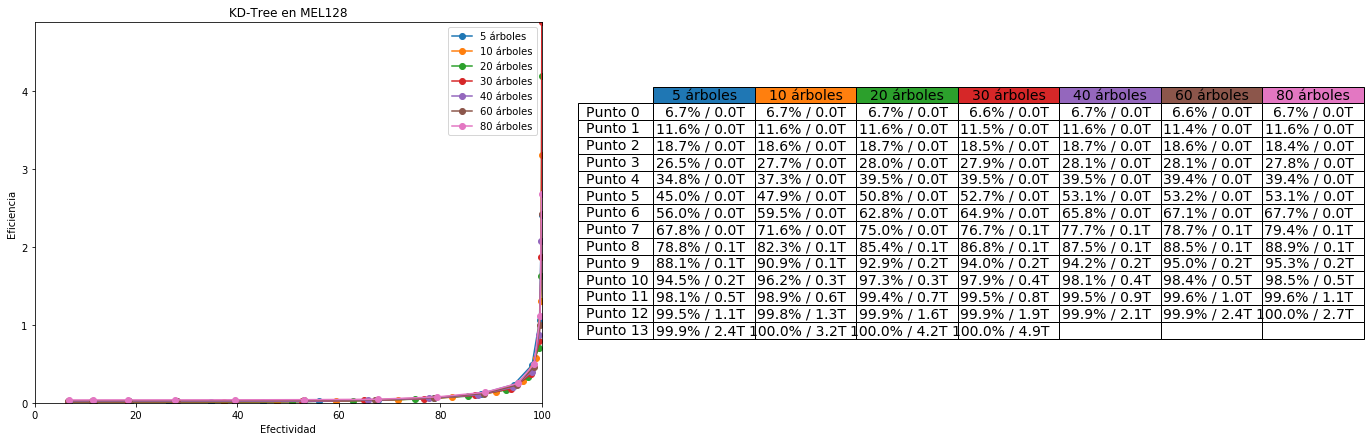

Hacer doble click sobre la imagen para ver en definición completa


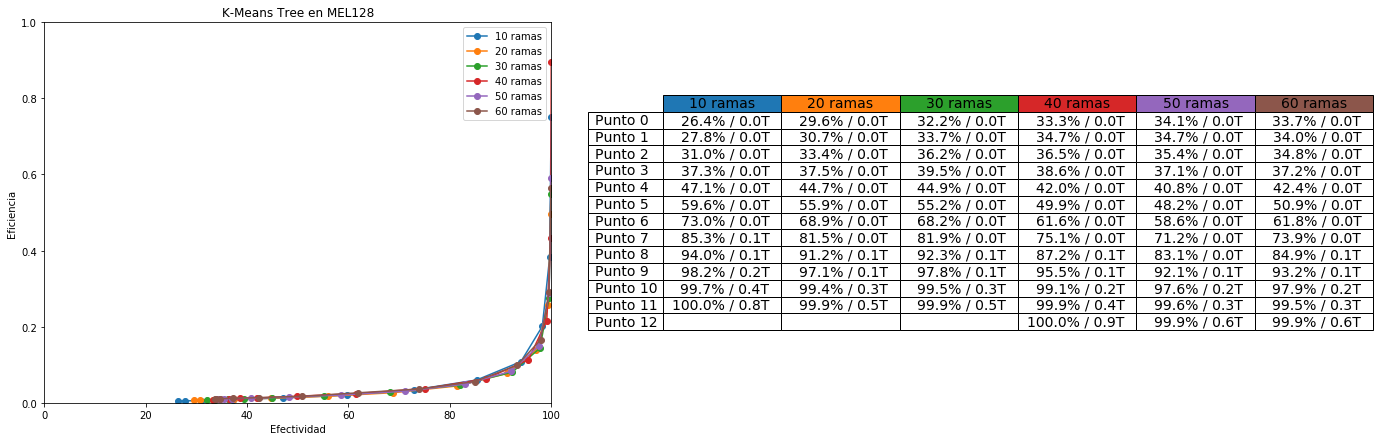

Hacer doble click sobre la imagen para ver en definición completa


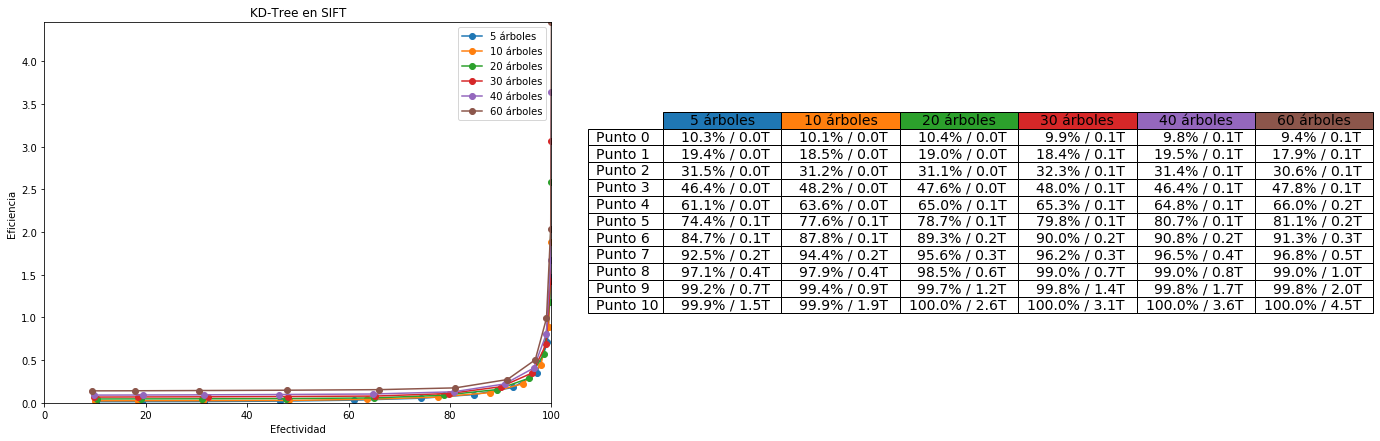

Hacer doble click sobre la imagen para ver en definición completa


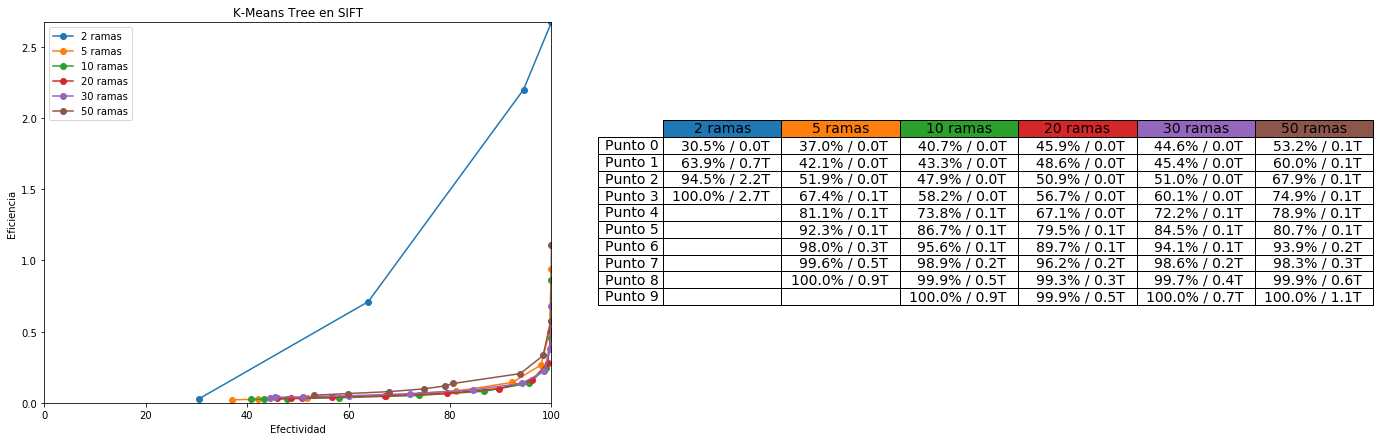

Hacer doble click sobre la imagen para ver en definición completa


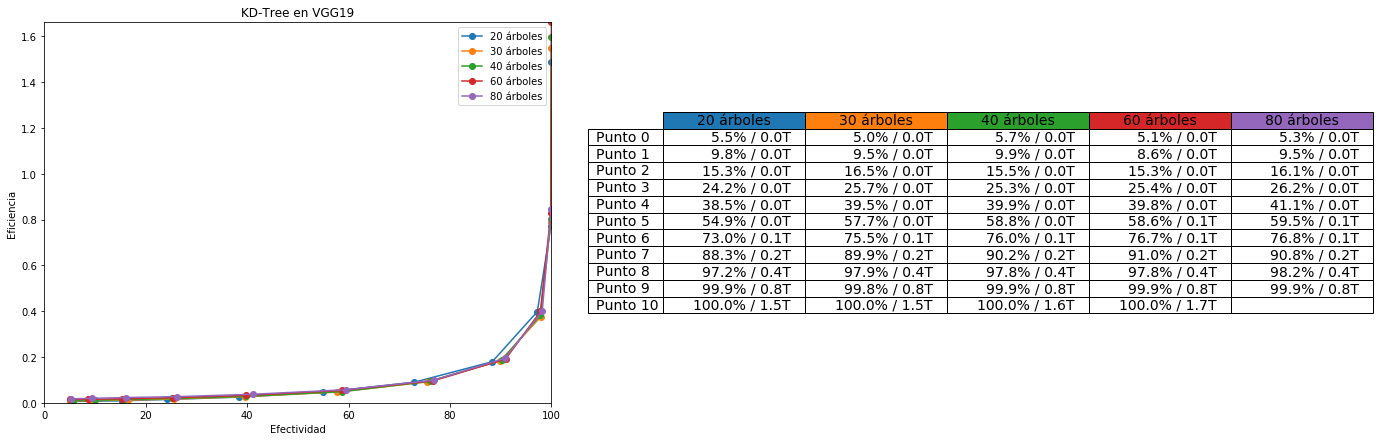

Hacer doble click sobre la imagen para ver en definición completa


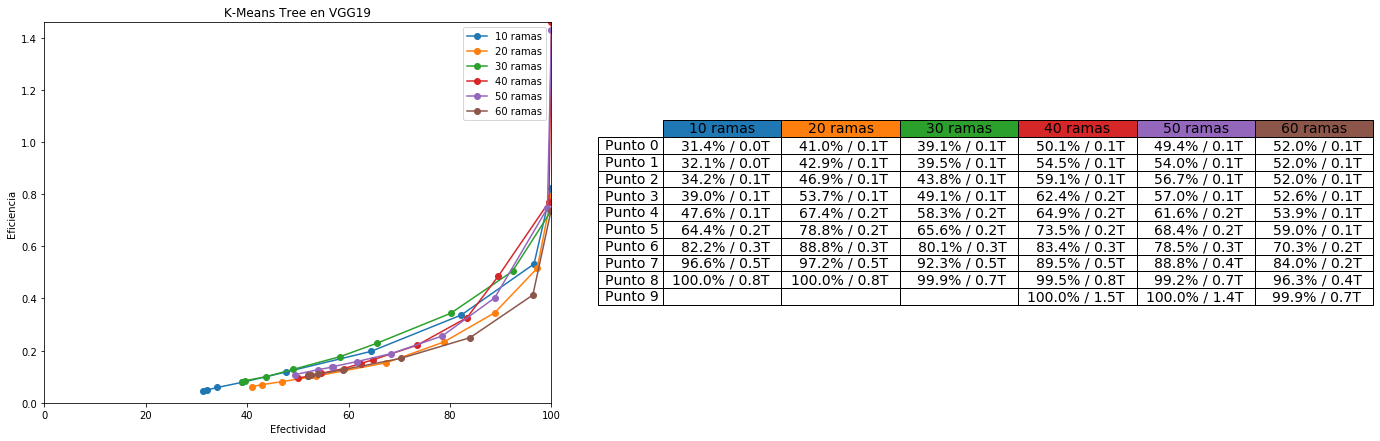

In [8]:
from Results import graficar_curvas

# graficar los datos
print('Hacer doble click sobre la imagen para ver en definición completa')
graficar_curvas(curvas_kdtree[0], leyenda_kdtree[0], "KD-Tree en MEL128")
graficar_curvas(curvas_kmeans[0], leyenda_kmeans[0], "K-Means Tree en MEL128")

graficar_curvas(curvas_kdtree[1], leyenda_kdtree[1], "KD-Tree en SIFT")
graficar_curvas(curvas_kmeans[1], leyenda_kmeans[1], "K-Means Tree en SIFT")

graficar_curvas(curvas_kdtree[2], leyenda_kdtree[2], "KD-Tree en VGG19")
graficar_curvas(curvas_kmeans[2], leyenda_kmeans[2], "K-Means Tree en VGG19")

### Obtener mejor curva para cada conjunto

In [41]:
def punto_debajo_de_curva(x, y, curva):
    # antes del primer segmento, se conecta con 0,0
    if x < curva[0][0]:
        x1, y1 = curva[0][0], curva[1][0]

        m = y1 / x1
        return y < m * x

    for i in range(1, len(curva[0])):

        # punto entre i - 1 e i
        if x < curva[0][i]:
            x1, y1 = curva[0][i - 1], curva[1][i - 1]
            x2, y2 = curva[0][i], curva[1][i]

            m = (y2 - y1) / (x2 - x1)
            return y < m * (x - x1) + y1

    # punto después del último segmento, se continua linea
    x1, y1 = curva[0][-2], curva[1][-2]
    x2, y2 = curva[0][-1], curva[1][-1]

    m = (y2 - y1) / (x2 - x1)
    return y < m * (x - x1) + y1


def largo(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 1/2


def curva_debajo_de_curva(curva1, curva2):
    # retorna un score que corresponde al porcentaje del largo de la curva1 que se encuentra debajo de la curva2.
    # para calular el largo debajo de la curva se toma segmento a segmento, si los 2 puntos del segmento
    # están debajo de la curva se suma el largo total, si 1 de los 2 se encuentra debajo se suma la mitad
    # del largo, y si ninguno está por debajo no se suma nada.
    
    largo_debajo = 0
    largo_total = 0
    
    anterior_debajo = punto_debajo_de_curva(curva1[0][0], curva1[1][0], curva2)
    
    for i in range(1, len(curva1[0])):
        largo_segmento = largo(curva1[0][i - 1], curva1[1][i - 1], curva1[0][i], curva1[1][i])
        largo_total += largo_segmento
        
        if punto_debajo_de_curva(curva1[0][i], curva1[1][i], curva2):
            if anterior_debajo:
                largo_debajo += largo_segmento
            else:
                largo_debajo += largo_segmento / 2
            
            anterior_debajo = True
         
        else:
            if anterior_debajo:
                largo_debajo += largo_segmento / 2
                
            anterior_debajo = False

    return largo_debajo / largo_total


def mejor_curva(curvas):
    mejor_i = 0

    for i in range(1, len(curvas)):
        score = curva_debajo_de_curva(curvas[i], curvas[mejor_i])

        # si más de la mitad de la curva se encuentra bajo la otra, se toma como mejor curva.
        if score > 0.5:
            mejor_i = i

    return mejor_i


mejor_kdtree = [[] for _ in range(num_datasets)]
for i in range(num_datasets):
    mejor_kdtree[i] = mejor_curva(curvas_kdtree[i])

print(f'mejor KD-Tree para MEL128: {leyenda_kdtree[0][mejor_kdtree[0]]}')
print(f'mejor KD-Tree para SIFT: {leyenda_kdtree[1][mejor_kdtree[1]]}')
print(f'mejor KD-Tree para VGG19: {leyenda_kdtree[2][mejor_kdtree[2]]}\n')

mejor_kmeans = [[] for _ in range(num_datasets)]
for i in range(num_datasets):
    mejor_kmeans[i] = mejor_curva(curvas_kmeans[i])

print(f'mejor K-Means Tree para MEL128: {leyenda_kmeans[0][mejor_kmeans[0]]}')
print(f'mejor K-Means Tree para SIFT: {leyenda_kmeans[1][mejor_kmeans[1]]}')
print(f'mejor K-Means Tree para VGG19: {leyenda_kmeans[2][mejor_kmeans[2]]}\n')



IndexError: list index out of range